In [12]:
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt

claim_data = pd.read_csv("claim_data.csv", header=0)

print(claim_data.shape)

claim_data.head()

(1789, 12)


,vin,policy_no,start_date,end_date,premium,report_no,registration_no,claim_no,paid,report_date,registration_date,accident_date
0,LMGMS1G86H1S00121,301031714401900011126,11/15/2017,2/14/2018,766.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LMGMS1G89H1S00128,301031714401900011139,11/15/2017,3/14/2018,999.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LMGMS1G89H1S00131,301031714401900011197,11/21/2017,2/20/2018,1700.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LMGMS1G81H1S00138,301031714401900011277,12/4/2017,3/3/2018,1802.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LMGMS1G80H1S00163,301031714401900011280,11/24/2017,12/24/2017,573.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
claim_data = claim_data[["vin", "accident_date", "paid"]]

print(claim_data.shape)

claim_data.head()

(1789, 3)


,vin,accident_date,paid
0,LMGMS1G86H1S00121,NaN,NaN
1,LMGMS1G89H1S00128,NaN,NaN
2,LMGMS1G89H1S00131,NaN,NaN
3,LMGMS1G81H1S00138,NaN,NaN
4,LMGMS1G80H1S00163,NaN,NaN


In [14]:
claim_data = claim_data.groupby("vin")['paid'].agg(['sum', 'count'])

print(claim_data.shape)

claim_data.head()

(1581, 2)


,sum,count
vin,,
LMGMS1G80H1000349,0.0,0
LMGMS1G80H1000366,50.0,1
LMGMS1G80H1S00163,0.0,0
LMGMS1G80H1S00177,0.0,0
LMGMS1G80H1S00227,0.0,0


In [16]:
claim_new = claim_data.rename(columns={'count': 'tot_accidents'})
claim_new = claim_data.rename(columns={'sum': 'payment'})
#claim_new['tot_accidents'] = claim_new['tot_accidents'].apply(lambda x: x if x <= 1 else 2)

print(claim_new.shape)

claim_new.head()

(1581, 2)


,payment,count
vin,,
LMGMS1G80H1000349,0.0,0
LMGMS1G80H1000366,50.0,1
LMGMS1G80H1S00163,0.0,0
LMGMS1G80H1S00177,0.0,0
LMGMS1G80H1S00227,0.0,0


# Run model on ubi_stats

In [17]:
all_metrics_data = pd.read_csv("ubi_stat.csv",sep='\t',header=0)
all_metrics_data.head()

,ubi_stats.vin,ubi_stats.acce_count,ubi_stats.agg_break_count,ubi_stats.agg_takeoff_count,ubi_stats.decel_count,ubi_stats.distance_driven,ubi_stats.driving_hours,ubi_stats.fuel_consumption,ubi_stats.high_speed_percentage,ubi_stats.mean_acce,...,ubi_stats.entropy,ubi_stats.entropy_last_month,ubi_stats.long_distance_count,ubi_stats.night_driving_hours,ubi_stats.percent_am_peak,ubi_stats.percent_long_distance,ubi_stats.percent_night_driving,ubi_stats.percent_pm_peak,ubi_stats.pm_peak_hours,ubi_stats.day
0,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,1.0,14.636111,0.000194,0.0,0.071335,...,0.943891,0.594390,0.0,0.0,0.263158,0.0,0.0,0.0,0.0,2017-09-26
1,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,0.0,6.831389,0.000000,0.0,0.066062,...,0.943891,0.489892,0.0,0.0,0.237658,0.0,0.0,0.0,0.0,2017-09-27
2,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,1.0,7.389444,0.000015,0.0,0.085359,...,0.943891,0.587585,0.0,0.0,0.229529,0.0,0.0,0.0,0.0,2017-09-28
3,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,0.0,5.529444,0.000000,0.0,0.081631,...,0.943891,0.528321,0.0,0.0,0.212777,0.0,0.0,0.0,0.0,2017-09-29
4,LMGMS1G89H1S00100,2.0,0.0,0.0,0.0,10.0,5.642500,0.028613,0.0,0.151694,...,8.304969,0.314494,0.0,0.0,0.408519,0.0,0.0,0.0,0.0,2017-09-30


In [18]:
all_metrics_data = all_metrics_data.drop(["ubi_stats.day"], axis=1)
all_metrics_data.fillna(0, inplace=True)
print(all_metrics_data.shape)
all_metrics_data.head()

(3047869, 34)


,ubi_stats.vin,ubi_stats.acce_count,ubi_stats.agg_break_count,ubi_stats.agg_takeoff_count,ubi_stats.decel_count,ubi_stats.distance_driven,ubi_stats.driving_hours,ubi_stats.fuel_consumption,ubi_stats.high_speed_percentage,ubi_stats.mean_acce,...,ubi_stats.am_peak_hours,ubi_stats.entropy,ubi_stats.entropy_last_month,ubi_stats.long_distance_count,ubi_stats.night_driving_hours,ubi_stats.percent_am_peak,ubi_stats.percent_long_distance,ubi_stats.percent_night_driving,ubi_stats.percent_pm_peak,ubi_stats.pm_peak_hours
0,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,1.0,14.636111,0.000194,0.0,0.071335,...,0.906944,0.943891,0.594390,0.0,0.0,0.263158,0.0,0.0,0.0,0.0
1,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,0.0,6.831389,0.000000,0.0,0.066062,...,2.178333,0.943891,0.489892,0.0,0.0,0.237658,0.0,0.0,0.0,0.0
2,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,1.0,7.389444,0.000015,0.0,0.085359,...,3.551389,0.943891,0.587585,0.0,0.0,0.229529,0.0,0.0,0.0,0.0
3,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,0.0,5.529444,0.000000,0.0,0.081631,...,4.835000,0.943891,0.528321,0.0,0.0,0.212777,0.0,0.0,0.0,0.0
4,LMGMS1G89H1S00100,2.0,0.0,0.0,0.0,10.0,5.642500,0.028613,0.0,0.151694,...,1.955556,8.304969,0.314494,0.0,0.0,0.408519,0.0,0.0,0.0,0.0


In [19]:
all_metrics_data = all_metrics_data.groupby("ubi_stats.vin", as_index=False).median()

print(all_metrics_data.shape)

all_metrics_data.head()

(27062, 34)


,ubi_stats.vin,ubi_stats.acce_count,ubi_stats.agg_break_count,ubi_stats.agg_takeoff_count,ubi_stats.decel_count,ubi_stats.distance_driven,ubi_stats.driving_hours,ubi_stats.fuel_consumption,ubi_stats.high_speed_percentage,ubi_stats.mean_acce,...,ubi_stats.am_peak_hours,ubi_stats.entropy,ubi_stats.entropy_last_month,ubi_stats.long_distance_count,ubi_stats.night_driving_hours,ubi_stats.percent_am_peak,ubi_stats.percent_long_distance,ubi_stats.percent_night_driving,ubi_stats.percent_pm_peak,ubi_stats.pm_peak_hours
0,600VG3071H710001C,0.0,0.0,0.0,0.0,2.0,2.210694,0.000309,0.0,0.102446,...,2.333889,3.392147,0.463325,0.0,0.00,0.293058,0.000000,0.000000,0.000000,0.000000
1,845VG3071H5261289,0.0,0.0,0.0,0.0,1.0,1.898194,0.000103,0.0,0.132566,...,2.280000,3.100351,0.469000,0.0,0.00,0.198324,0.000000,0.000000,0.000000,0.000000
2,845VG3071J4190PB2,0.0,0.0,0.0,0.0,3.0,7.086944,0.003432,0.0,0.089097,...,0.560417,3.546594,1.488648,0.0,0.00,0.120585,0.000000,0.000000,0.000000,0.000000
3,LMGMS1G80H1000013,0.0,2.0,0.0,3.0,81.0,3.651944,2.866278,0.0,0.367570,...,13.996667,10.926558,1.222883,5.0,0.41,0.141939,0.018732,0.004991,0.044805,4.928333
4,LMGMS1G80H1000027,0.0,2.0,0.0,2.0,5.0,0.547778,0.171842,0.0,0.383548,...,2.928333,5.098957,0.260459,0.0,0.00,0.179932,0.000000,0.000000,0.000000,0.000000


In [20]:
all_metrics_data.columns

Index([u'ubi_stats.vin', u'ubi_stats.acce_count', u'ubi_stats.agg_break_count',
       u'ubi_stats.agg_takeoff_count', u'ubi_stats.decel_count',
       u'ubi_stats.distance_driven', u'ubi_stats.driving_hours',
       u'ubi_stats.fuel_consumption', u'ubi_stats.high_speed_percentage',
       u'ubi_stats.mean_acce', u'ubi_stats.mean_decel',
       u'ubi_stats.mean_fuel_efficiency', u'ubi_stats.median_acce',
       u'ubi_stats.median_decel', u'ubi_stats.odo_end',
       u'ubi_stats.speed_average', u'ubi_stats.speed_average_pos',
       u'ubi_stats.speed_max', u'ubi_stats.speeding_count10',
       u'ubi_stats.speeding_count20', u'ubi_stats.speeding_count30',
       u'ubi_stats.speeding_count40', u'ubi_stats.speeding_count40_plus',
       u'ubi_stats.turn_count', u'ubi_stats.am_peak_hours',
       u'ubi_stats.entropy', u'ubi_stats.entropy_last_month',
       u'ubi_stats.long_distance_count', u'ubi_stats.night_driving_hours',
       u'ubi_stats.percent_am_peak', u'ubi_stats.percent_long_dista

# modfiy column name

In [21]:
"""
new_columns = all_metrics_data.columns.values
new_columns[0] = 'vin'
all_metrics_data.columns = new_columns
"""
"""
df.columns = df.columns.str.replace('$','')
"""

"\ndf.columns = df.columns.str.replace('$','')\n"

In [22]:
#all_metrics_data.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
all_metrics_data.rename(lambda x: x[10:], axis='columns', inplace=True)

In [23]:
all_metrics_data.columns

Index([u'vin', u'acce_count', u'agg_break_count', u'agg_takeoff_count',
       u'decel_count', u'distance_driven', u'driving_hours',
       u'fuel_consumption', u'high_speed_percentage', u'mean_acce',
       u'mean_decel', u'mean_fuel_efficiency', u'median_acce', u'median_decel',
       u'odo_end', u'speed_average', u'speed_average_pos', u'speed_max',
       u'speeding_count10', u'speeding_count20', u'speeding_count30',
       u'speeding_count40', u'speeding_count40_plus', u'turn_count',
       u'am_peak_hours', u'entropy', u'entropy_last_month',
       u'long_distance_count', u'night_driving_hours', u'percent_am_peak',
       u'percent_long_distance', u'percent_night_driving', u'percent_pm_peak',
       u'pm_peak_hours'],
      dtype='object')

In [24]:
df_all = pd.merge(all_metrics_data, claim_new, on='vin', how='inner')

print(df_all.shape)

df_all.head()

(1581, 36)


,vin,acce_count,agg_break_count,agg_takeoff_count,decel_count,distance_driven,driving_hours,fuel_consumption,high_speed_percentage,mean_acce,...,entropy_last_month,long_distance_count,night_driving_hours,percent_am_peak,percent_long_distance,percent_night_driving,percent_pm_peak,pm_peak_hours,payment,count
0,LMGMS1G80H1000349,0.0,2.0,0.0,2.0,38.0,1.694444,1.535503,0.0,0.399755,...,0.654252,2.0,1.169167,0.152846,0.007937,0.018098,0.013967,0.766944,0.0,0
1,LMGMS1G80H1000366,0.0,1.0,0.0,1.0,11.0,1.406667,0.151815,0.0,0.286709,...,0.378577,0.0,0.000000,0.149385,0.000000,0.000000,0.040256,1.018333,50.0,1
2,LMGMS1G80H1S00163,0.0,0.0,0.0,0.0,20.0,0.881944,0.797743,0.0,0.366820,...,0.392016,0.0,3.611667,0.077001,0.000000,0.099558,0.052064,1.478889,0.0,0
3,LMGMS1G80H1S00177,0.0,3.0,0.0,3.0,54.0,2.094444,1.980575,0.0,0.360304,...,0.574436,0.0,0.993611,0.117424,0.000000,0.026452,0.006415,0.190833,0.0,0
4,LMGMS1G80H1S00227,0.0,2.0,0.0,2.0,44.0,1.441667,1.933524,0.0,0.371428,...,0.458581,0.0,3.176667,0.089208,0.000000,0.130130,0.000000,0.000000,0.0,0


In [25]:
df_all.to_csv("metrics_and_claims.csv", header=True, index=False)

df_all = df_all.drop("vin", axis=1)

df_all.columns

Index([u'acce_count', u'agg_break_count', u'agg_takeoff_count', u'decel_count',
       u'distance_driven', u'driving_hours', u'fuel_consumption',
       u'high_speed_percentage', u'mean_acce', u'mean_decel',
       u'mean_fuel_efficiency', u'median_acce', u'median_decel', u'odo_end',
       u'speed_average', u'speed_average_pos', u'speed_max',
       u'speeding_count10', u'speeding_count20', u'speeding_count30',
       u'speeding_count40', u'speeding_count40_plus', u'turn_count',
       u'am_peak_hours', u'entropy', u'entropy_last_month',
       u'long_distance_count', u'night_driving_hours', u'percent_am_peak',
       u'percent_long_distance', u'percent_night_driving', u'percent_pm_peak',
       u'pm_peak_hours', u'payment', u'count'],
      dtype='object')

In [26]:
df_all.count()

acce_count               1581
agg_break_count          1581
agg_takeoff_count        1581
decel_count              1581
distance_driven          1581
driving_hours            1581
fuel_consumption         1581
high_speed_percentage    1581
mean_acce                1581
mean_decel               1581
mean_fuel_efficiency     1581
median_acce              1581
median_decel             1581
odo_end                  1581
speed_average            1581
speed_average_pos        1581
speed_max                1581
speeding_count10         1581
speeding_count20         1581
speeding_count30         1581
speeding_count40         1581
speeding_count40_plus    1581
turn_count               1581
am_peak_hours            1581
entropy                  1581
entropy_last_month       1581
long_distance_count      1581
night_driving_hours      1581
percent_am_peak          1581
percent_long_distance    1581
percent_night_driving    1581
percent_pm_peak          1581
pm_peak_hours            1581
payment   

In [27]:
df_all = df_all.rename(columns={'count': 'tot_accidents'})

In [28]:
df_all.head()

,acce_count,agg_break_count,agg_takeoff_count,decel_count,distance_driven,driving_hours,fuel_consumption,high_speed_percentage,mean_acce,mean_decel,...,entropy_last_month,long_distance_count,night_driving_hours,percent_am_peak,percent_long_distance,percent_night_driving,percent_pm_peak,pm_peak_hours,payment,tot_accidents
0,0.0,2.0,0.0,2.0,38.0,1.694444,1.535503,0.0,0.399755,-0.379107,...,0.654252,2.0,1.169167,0.152846,0.007937,0.018098,0.013967,0.766944,0.0,0
1,0.0,1.0,0.0,1.0,11.0,1.406667,0.151815,0.0,0.286709,-0.258289,...,0.378577,0.0,0.000000,0.149385,0.000000,0.000000,0.040256,1.018333,50.0,1
2,0.0,0.0,0.0,0.0,20.0,0.881944,0.797743,0.0,0.366820,-0.356622,...,0.392016,0.0,3.611667,0.077001,0.000000,0.099558,0.052064,1.478889,0.0,0
3,0.0,3.0,0.0,3.0,54.0,2.094444,1.980575,0.0,0.360304,-0.342482,...,0.574436,0.0,0.993611,0.117424,0.000000,0.026452,0.006415,0.190833,0.0,0
4,0.0,2.0,0.0,2.0,44.0,1.441667,1.933524,0.0,0.371428,-0.378186,...,0.458581,0.0,3.176667,0.089208,0.000000,0.130130,0.000000,0.000000,0.0,0


In [29]:
df_all[df_all['tot_accidents']>0].count()

acce_count               337
agg_break_count          337
agg_takeoff_count        337
decel_count              337
distance_driven          337
driving_hours            337
fuel_consumption         337
high_speed_percentage    337
mean_acce                337
mean_decel               337
mean_fuel_efficiency     337
median_acce              337
median_decel             337
odo_end                  337
speed_average            337
speed_average_pos        337
speed_max                337
speeding_count10         337
speeding_count20         337
speeding_count30         337
speeding_count40         337
speeding_count40_plus    337
turn_count               337
am_peak_hours            337
entropy                  337
entropy_last_month       337
long_distance_count      337
night_driving_hours      337
percent_am_peak          337
percent_long_distance    337
percent_night_driving    337
percent_pm_peak          337
pm_peak_hours            337
payment                  337
tot_accidents 

In [30]:
df_all['tot_accidents'] = df_all['tot_accidents'].apply(lambda x: x if x <= 1 else 2)

# Split into train and test

In [31]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_all, test_size=0.2)
train.count()

acce_count               1264
agg_break_count          1264
agg_takeoff_count        1264
decel_count              1264
distance_driven          1264
driving_hours            1264
fuel_consumption         1264
high_speed_percentage    1264
mean_acce                1264
mean_decel               1264
mean_fuel_efficiency     1264
median_acce              1264
median_decel             1264
odo_end                  1264
speed_average            1264
speed_average_pos        1264
speed_max                1264
speeding_count10         1264
speeding_count20         1264
speeding_count30         1264
speeding_count40         1264
speeding_count40_plus    1264
turn_count               1264
am_peak_hours            1264
entropy                  1264
entropy_last_month       1264
long_distance_count      1264
night_driving_hours      1264
percent_am_peak          1264
percent_long_distance    1264
percent_night_driving    1264
percent_pm_peak          1264
pm_peak_hours            1264
payment   

In [32]:
test.count()

acce_count               317
agg_break_count          317
agg_takeoff_count        317
decel_count              317
distance_driven          317
driving_hours            317
fuel_consumption         317
high_speed_percentage    317
mean_acce                317
mean_decel               317
mean_fuel_efficiency     317
median_acce              317
median_decel             317
odo_end                  317
speed_average            317
speed_average_pos        317
speed_max                317
speeding_count10         317
speeding_count20         317
speeding_count30         317
speeding_count40         317
speeding_count40_plus    317
turn_count               317
am_peak_hours            317
entropy                  317
entropy_last_month       317
long_distance_count      317
night_driving_hours      317
percent_am_peak          317
percent_long_distance    317
percent_night_driving    317
percent_pm_peak          317
pm_peak_hours            317
payment                  317
tot_accidents 

In [33]:
test.iloc[0:2,-1:]

,tot_accidents
1311,0
1143,0


In [34]:
train.to_csv("train_data.csv", header=True, index=False)

In [35]:
train.tot_accidents.value_counts()

0    1000
1     209
2      55
Name: tot_accidents, dtype: int64

In [36]:
train.head()

,acce_count,agg_break_count,agg_takeoff_count,decel_count,distance_driven,driving_hours,fuel_consumption,high_speed_percentage,mean_acce,mean_decel,...,entropy_last_month,long_distance_count,night_driving_hours,percent_am_peak,percent_long_distance,percent_night_driving,percent_pm_peak,pm_peak_hours,payment,tot_accidents
1265,0.0,1.0,0.0,1.0,16.0,1.113889,0.318815,0.0,0.384005,-0.420867,...,0.479438,0.0,0.313333,0.073417,0.000000,0.011380,0.021320,0.362222,0.0,0
972,0.0,0.0,0.0,0.0,34.0,1.574306,1.261321,0.0,0.306734,-0.317562,...,0.479438,0.0,1.585556,0.171042,0.000000,0.045056,0.010276,0.443611,0.0,0
1359,3.0,21.5,0.0,22.0,73.5,3.121389,2.870692,0.0,0.487507,-0.443154,...,1.463530,2.0,0.000000,0.198127,0.006773,0.000000,0.002499,0.190556,0.0,0
902,0.0,2.0,0.0,2.0,35.0,2.439722,0.776555,0.0,0.372891,-0.360220,...,0.931518,0.0,0.068611,0.169752,0.000000,0.001791,0.038958,1.996944,2000.0,1
800,0.0,0.0,0.0,0.0,36.0,1.711111,1.193817,0.0,0.359494,-0.374479,...,0.781250,0.0,1.049167,0.123388,0.000000,0.026335,0.017860,0.555833,0.0,0


In [39]:
test.to_csv("test_data.csv", header=True, index=False)

In [40]:
test.tot_accidents.value_counts()

0    244
1     57
2     16
Name: tot_accidents, dtype: int64

In [41]:
test.head()

,acce_count,agg_break_count,agg_takeoff_count,decel_count,distance_driven,driving_hours,fuel_consumption,high_speed_percentage,mean_acce,mean_decel,...,entropy_last_month,long_distance_count,night_driving_hours,percent_am_peak,percent_long_distance,percent_night_driving,percent_pm_peak,pm_peak_hours,payment,tot_accidents
1311,0.0,3.0,0.0,3.0,97.0,3.349306,3.616083,0.0,0.328814,-0.333553,...,0.981378,5.0,0.282500,0.141555,0.035831,0.005848,0.029825,1.544861,0.00,0
1143,0.0,3.0,0.0,3.0,38.0,4.013056,0.647852,0.0,0.278591,-0.326828,...,0.799064,0.0,0.000000,0.218631,0.000000,0.000000,0.001740,0.090000,0.00,0
41,0.0,5.0,0.0,5.0,78.5,3.014306,2.770312,0.0,0.416316,-0.368895,...,0.981378,1.0,2.020000,0.168903,0.008132,0.030395,0.017716,1.458333,8748.00,1
1207,0.0,6.0,0.0,6.0,153.0,6.429167,4.264770,0.0,0.299314,-0.289014,...,1.219708,1.0,5.647778,0.149238,0.005291,0.044285,0.045387,5.083056,16670.17,2
769,0.0,3.0,0.0,3.0,115.0,3.263889,4.755124,0.0,0.355290,-0.346277,...,0.958877,2.0,0.000000,0.178065,0.007659,0.000000,0.021614,1.939167,14048.00,1


# Up-sample Minority Class

In [43]:
#import the resampling module from Scikit-Learn
from sklearn.utils import resample

In [44]:
# Separate majority and minority classes
df_majority = train[train.tot_accidents==0]
df_minority1 = train[train.tot_accidents==1]
df_minority2 = train[train.tot_accidents==2]

In [45]:
train.tot_accidents.value_counts()

0    1000
1     209
2      55
Name: tot_accidents, dtype: int64

# Manually run

In [47]:
# Upsample minority class
df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

In [48]:
# Upsample minority class
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

In [49]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled1, df_minority_upsampled2])

In [50]:
df_upsampled.tot_accidents.value_counts()

1    1000
2    1000
0    1000
Name: tot_accidents, dtype: int64

# Downsample test data 

In [51]:
# Separate majority and minority classes
test_majority = test[test.tot_accidents==0]
test_minority1 = test[test.tot_accidents==1]
test_minority2 = test[test.tot_accidents==2]

In [52]:
test.tot_accidents.value_counts()

0    244
1     57
2     16
Name: tot_accidents, dtype: int64

In [53]:
# Downsample majority class
test_majority_downsampled = resample(test_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=57,     # to match minority class
                                 random_state=123) # reproducible results

In [54]:
# Combine minority class with downsampled majority class
test_balanced = pd.concat([test_majority_downsampled, test_minority1, test_minority2])

In [55]:
# Display new class counts
test_balanced.tot_accidents.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

1    57
0    57
2    16
Name: tot_accidents, dtype: int64

# Separate input features (X) and target variable (y)

In [56]:
y_new = df_upsampled.tot_accidents
X_new = df_upsampled.drop('tot_accidents', axis=1)

# Train logistic model on upsampled dataset

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Train model
clf_3 = LogisticRegression(penalty='l1', C=0.5).fit(X_new, y_new)
 
# Predict on test set
pred_y_3 = clf_3.predict(test_balanced.iloc[:,:-1].values)

# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )

[0 1 2]


In [61]:
print(clf_3.coef_)

[[ 9.74136001e-01 -2.39784692e-02  0.00000000e+00 -3.16521770e-04
  -1.65064366e-03  8.14663930e-02 -1.16980803e-02  0.00000000e+00
   1.32459654e-02 -6.12699645e-02 -2.60379266e-03  1.90310182e-04
  -8.29166595e-03 -2.60861276e-05 -6.15588255e-03 -2.88570880e-02
   3.92047558e-02 -1.81848157e-03 -2.49004948e-03  1.58771130e-02
  -1.99517420e-02  1.04146419e-03  0.00000000e+00 -8.06868399e-02
  -5.74530445e-03 -6.23030240e-03  1.09962614e-01  9.44377639e-02
   1.49935145e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.45223354e-01 -8.35644973e-02]
 [-4.16948663e-01 -7.52572616e-01  0.00000000e+00  7.80658268e-01
  -4.47076455e-02  0.00000000e+00  5.61262615e-01  0.00000000e+00
   0.00000000e+00  3.31305488e-01 -3.91910335e-01  0.00000000e+00
   0.00000000e+00  1.03444188e-05  1.54183488e-02  6.72757407e-02
  -4.39785892e-03  1.09970989e-02 -5.59064751e-03 -4.02651013e-03
  -3.95204395e-03 -1.35930421e-04  0.00000000e+00  1.15151851e-01
  -8.01580582e-02  7.67902197e-02 -9.0669

In [62]:
# How's our accuracy?
print( accuracy_score(test_balanced.iloc[:,-1:].values, pred_y_3) )

0.6846153846153846


# Use ROC to evalute logistic regression performance after sampling

In [63]:
# Predict class probabilities
prob_y_3 = clf_3.predict_proba(test_balanced.iloc[:,:-1].values)

/usr/lib64/python2.7/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [64]:
clf_3.classes_

array([0, 1, 2])

In [65]:
print(prob_y_3)

[[6.04038781e-001 2.10626454e-001 1.85334765e-001]
 [6.21099749e-001 3.53709771e-001 2.51904804e-002]
 [6.57912561e-001 2.33106333e-001 1.08981107e-001]
 [4.99426094e-001 5.00278159e-001 2.95747088e-004]
 [6.15775360e-001 1.95605232e-001 1.88619408e-001]
 [5.50788975e-001 2.77812271e-001 1.71398754e-001]
 [4.66216483e-001 1.11838618e-001 4.21944898e-001]
 [6.17431768e-001 3.31511666e-001 5.10565657e-002]
 [6.65879511e-001 2.92043854e-001 4.20766342e-002]
 [6.16705347e-001 2.92233847e-001 9.10608055e-002]
 [5.38817566e-001 2.30404724e-001 2.30777710e-001]
 [6.03234378e-001 1.26033499e-001 2.70732123e-001]
 [6.31656399e-001 3.30972193e-001 3.73714081e-002]
 [6.39507085e-001 3.05237994e-001 5.52549211e-002]
 [7.02640831e-001 1.90370675e-001 1.06988494e-001]
 [5.56952625e-001 2.02921946e-001 2.40125428e-001]
 [8.84844829e-001 7.58200836e-002 3.93350872e-002]
 [6.14407423e-001 6.01049832e-002 3.25487594e-001]
 [7.08221236e-001 2.85505127e-001 6.27363735e-003]
 [7.07965457e-001 2.88496855e-0

In [66]:
# Keep only the positive class
prob_y_3 = [p[1] for p in prob_y_3]

In [67]:
prob_y_3[:3] # Example

[0.21062645392444787, 0.3537097706074008, 0.23310633277521972]

In [81]:
from sklearn.metrics import roc_auc_score
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
        return roc_auc_dict

print("\nLogistic Regression")
# assuming your already have a list of actual_class and predicted_class from the logistic regression classifier
lr_roc_auc_multiclass = roc_auc_score_multiclass(test_balanced.iloc[:,-1:].values, 
                                                clf_3.predict(test_balanced.iloc[:,:-1].values))
print(lr_roc_auc_multiclass)


Logistic Regression


TypeError: unhashable type: 'numpy.ndarray'

In [85]:
roc_auc_dict={}
for per_class in test_balanced.iloc[:,-1:].values:
    #creating a list of all the classes except the current class 
    other_class = [x for x in test_balanced.iloc[:,-1:].values if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in test_balanced.iloc[:,-1:].values]
    new_pred_class = [0 if x in other_class else 1 for x in clf_3.predict(test_balanced.iloc[:,:-1].values)]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = "macro")
    roc_auc_dict[per_class] = roc_auc

TypeError: unhashable type: 'numpy.ndarray'

In [78]:
from sklearn.metrics import classification_report
sk_report = classification_report(digits=6,
                                  y_true=test_balanced.iloc[:,-1:].values,
                                  y_pred=clf_3.predict(test_balanced.iloc[:,:-1].values),
                                  target_names=['no accident','1 accident','more than 1 accidents'])
print(sk_report)

                       precision    recall  f1-score   support

          no accident   0.835821  0.982456  0.903226        57
           1 accident   0.807692  0.368421  0.506024        57
more than 1 accidents   0.324324  0.750000  0.452830        16

            micro avg   0.684615  0.684615  0.684615       130
            macro avg   0.655946  0.700292  0.620693       130
         weighted avg   0.760534  0.684615  0.673635       130



In [77]:
report_with_auc = classification_report(
    y_true=test_balanced.iloc[:,-1:].values, 
    y_pred=clf_3.predict(test_balanced.iloc[:,:-1].values), 
    y_score=clf_3.predict_proba(test_balanced.iloc[:,:-1].values))

print(report_with_auc)

TypeError: classification_report() got an unexpected keyword argument 'y_score'

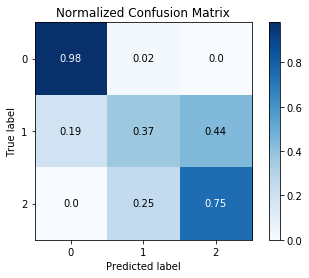

In [86]:
skplt.metrics.plot_confusion_matrix(test_balanced.iloc[:,-1:].values, clf_3.predict(test_balanced.iloc[:,:-1].values),
                                    normalize=True)
plt.show()

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


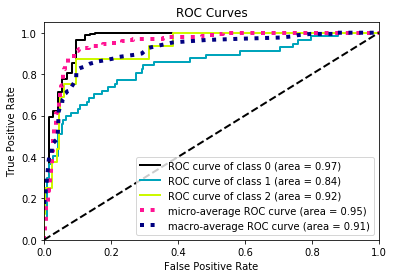

In [87]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(test.iloc[:,-1:].values, clf_3.predict_proba(test.iloc[:,:-1].values))
plt.show()

# Train SVM Model on new balanced dataset

In [88]:
from sklearn import svm
# create and configure model
clf_4 = svm.SVC(C=2, gamma='scale', probability=True)
# fit model
clf_4.fit(X_new, y_new)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
# How's our accuracy?
print( accuracy_score(test_balanced.iloc[:,-1:].values, clf_4.predict(test_balanced.iloc[:,:-1].values)) )

0.7538461538461538


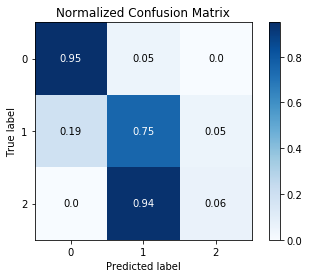

In [90]:
skplt.metrics.plot_confusion_matrix(test_balanced.iloc[:,-1:].values, clf_4.predict(test_balanced.iloc[:,:-1].values),
                                    normalize=True)
plt.show()

# Use ROC to evalute SVM performance after sampling

In [91]:
# Predict class probabilities
prob_y_4 = clf_4.predict_proba(test_balanced.iloc[:,:-1].values)
 
# Keep only the positive class
prob_y_4 = [p[1] for p in prob_y_4]
 
prob_y_4[:5] # Example

print( roc_auc_score(test_balanced.iloc[:,-1:].values, prob_y_4) )

ValueError: multiclass format is not supported

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


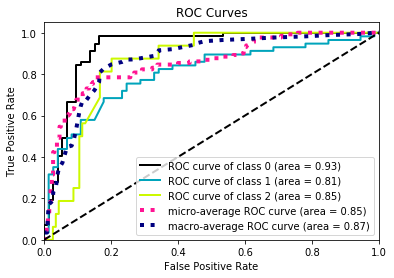

In [92]:
skplt.metrics.plot_roc_curve(test_balanced.iloc[:,-1:].values, clf_4.predict_proba(test_balanced.iloc[:,:-1].values))
plt.show()

# Use Tree-Based Algorithms

In [93]:
from sklearn.ensemble import RandomForestClassifier
y = test_balanced.tot_accidents
X = test_balanced.drop('tot_accidents', axis=1)

# Use a Random Forest on the original imbalanced dataset

In [96]:
# Train model
clf_5 = RandomForestClassifier(max_depth=2)
clf_5.fit(X_new, y_new)

/usr/lib64/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
# Predict on test set
pred_y_5 = clf_5.predict(test.iloc[:,:-1].values)

In [98]:
# Is our model predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]

[0 1 2]


In [99]:
# How's our accuracy?
print( accuracy_score(test.iloc[:,-1:].values, pred_y_5) )

0.6908517350157729


In [100]:
# What about AUROC?
prob_y_5 = clf_5.predict_proba(test.iloc[:,:-1].values)
prob_y_5 = [p[1] for p in prob_y_5]
print( roc_auc_score(test.iloc[:,-1:].values, prob_y_5) )

ValueError: multiclass format is not supported

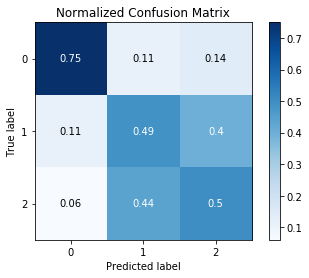

In [101]:
skplt.metrics.plot_confusion_matrix(test.iloc[:,-1:].values, pred_y_5, normalize=True)
plt.show()

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


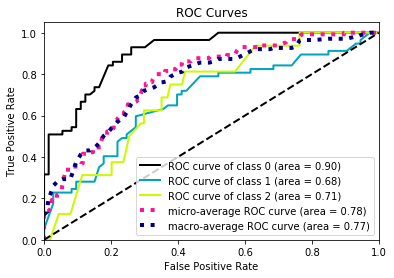

In [102]:
skplt.metrics.plot_roc_curve(test_balanced.iloc[:,-1:].values, clf_5.predict_proba(test_balanced.iloc[:,:-1].values))
plt.show()

# Use a Random Forest on the new balanced dataset

In [103]:
clf_6 = RandomForestClassifier(max_depth=2, min_samples_leaf=2)
clf_6.fit(X_new, y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
# Predict on test set
pred_y_6 = clf_6.predict(test_balanced.iloc[:,:-1].values)

In [105]:
print( np.unique( pred_y_6 ) )
# [0 1]

[0 1 2]


In [106]:
# How's our accuracy?
print( accuracy_score(test_balanced.iloc[:,-1:].values, pred_y_6) )

0.6846153846153846


In [107]:
# What about AUROC?
prob_y_6 = clf_6.predict_proba(test_balanced.iloc[:,:-1].values)
prob_y_6 = [p[1] for p in prob_y_6]
print( roc_auc_score(test_balanced.iloc[:,-1:].values, prob_y_6) )

ValueError: multiclass format is not supported

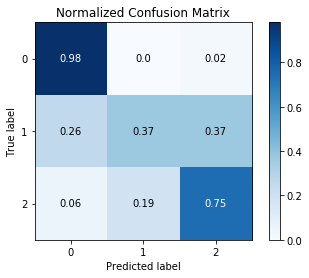

In [108]:
skplt.metrics.plot_confusion_matrix(test_balanced.iloc[:,-1:].values, pred_y_6, normalize=True)
plt.show()

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


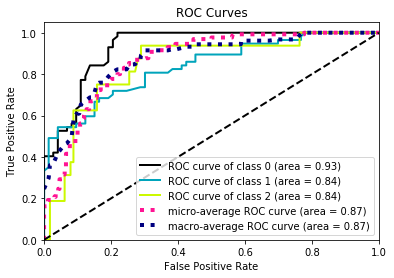

In [109]:
skplt.metrics.plot_roc_curve(test_balanced.iloc[:,-1:].values, clf_6.predict_proba(test_balanced.iloc[:,:-1].values))
plt.show()

In [110]:
arr = list(X_new.columns.values)
print(arr)

['acce_count', 'agg_break_count', 'agg_takeoff_count', 'decel_count', 'distance_driven', 'driving_hours', 'fuel_consumption', 'high_speed_percentage', 'mean_acce', 'mean_decel', 'mean_fuel_efficiency', 'median_acce', 'median_decel', 'odo_end', 'speed_average', 'speed_average_pos', 'speed_max', 'speeding_count10', 'speeding_count20', 'speeding_count30', 'speeding_count40', 'speeding_count40_plus', 'turn_count', 'am_peak_hours', 'entropy', 'entropy_last_month', 'long_distance_count', 'night_driving_hours', 'percent_am_peak', 'percent_long_distance', 'percent_night_driving', 'percent_pm_peak', 'pm_peak_hours', 'payment']


Feature ranking:
1. feature 33 payment (0.193226)
2. feature 24 entropy (0.183735)
3. feature 13 odo_end (0.154932)
4. feature 14 speed_average (0.101588)
5. feature 15 speed_average_pos (0.081230)
6. feature 10 mean_fuel_efficiency (0.067983)
7. feature 23 am_peak_hours (0.060595)
8. feature 18 speeding_count20 (0.047005)
9. feature 16 speed_max (0.035673)
10. feature 9 mean_decel (0.029666)
11. feature 32 pm_peak_hours (0.024095)
12. feature 6 fuel_consumption (0.018635)
13. feature 25 entropy_last_month (0.001637)
14. feature 11 median_acce (0.000000)
15. feature 1 agg_break_count (0.000000)
16. feature 2 agg_takeoff_count (0.000000)
17. feature 3 decel_count (0.000000)
18. feature 4 distance_driven (0.000000)
19. feature 5 driving_hours (0.000000)
20. feature 7 high_speed_percentage (0.000000)
21. feature 8 mean_acce (0.000000)
22. feature 31 percent_pm_peak (0.000000)
23. feature 12 median_decel (0.000000)
24. feature 26 long_distance_count (0.000000)
25. feature 30 percent_night_

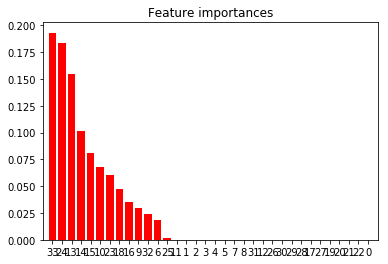

In [111]:
importances = clf_6.feature_importances_
std = np.std([clf_6.feature_importances_ for tree in clf_6.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_new.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], arr[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_new.shape[1]), indices)
plt.xlim([-1, X_new.shape[1]])
plt.show()

# Neural Netwworks

In [ ]:
from sklearn.neural_network import MLPClassifier
clf7 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, ), random_state=1)
clf7.fit(X_new, y_new)   

In [ ]:
pred_y_7=clf.predict(test_balanced.iloc[:,:-1].values)

In [ ]:
[coef.shape for coef in clf7.coefs_]

In [ ]:
clf7.classes_

In [ ]:
clf7.predict_proba(test_balanced.iloc[:,:-1].values)  

In [ ]:
# How's our accuracy?
print( accuracy_score(test_balanced.iloc[:,-1:].values, pred_y_7) )

In [ ]:
# What about AUROC?
prob_y_7 = clf7.predict_proba(test_balanced.iloc[:,:-1].values)
prob_y_7 = [p[1] for p in prob_y_7]
print( roc_auc_score(test_balanced.iloc[:,-1:].values, prob_y_7) )

In [ ]:
skplt.metrics.plot_confusion_matrix(test_balanced.iloc[:,-1:].values, pred_y_7, normalize=True)
plt.show()

In [ ]:
skplt.metrics.plot_roc_curve(test_balanced.iloc[:,-1:].values, clf7.predict_proba(test_balanced.iloc[:,:-1].values))
plt.show()

# Run model on trip_metrics

In [ ]:
metrics_data = pd.read_csv("trip_metrics.csv", header=0)
metrics_data = metrics_data.drop(["trip_metrics.vintype", "trip_metrics.subtype", "start_day"], axis=1)

metrics_data.fillna(0, inplace=True)

print(metrics_data.shape)

metrics_data.head()


In [ ]:
metrics_data = metrics_data.groupby("vin", as_index=False).median()

print(metrics_data.shape)

metrics_data.head()

In [ ]:
df_trip = pd.merge(metrics_data, claim_new, on='vin', how='inner')

print(df_trip.shape)

df_trip.head()

In [ ]:
df_trip.to_csv("metrics_and_claims.csv", header=True, index=False)

df_trip = df.drop("vin", axis=1)

df_trip.columns

In [ ]:
df_trip.count()

In [ ]:
df_trip[df_trip['tot_accidents']>0].count()

In [ ]:
from sklearn.model_selection import train_test_split
train_trip,test_trip = train_test_split(df_trip, test_size=0.2)
train_trip.count()

In [ ]:
test_trip.count()

In [ ]:
test_trip.iloc[0:2,-1:]

In [ ]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(train_trip.iloc[:,:-1].values, train_trip.iloc[:,-1:].values)

In [ ]:
from sklearn.metrics import accuracy_score
pred = clf.predict(test_trip.iloc[:,:-1].values)
accuracy_score(test_trip.iloc[:,-1:].values, pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_trip.iloc[:,-1:].values, pred)

In [ ]:
from sklearn.metrics import classification_report
target_names = {'Normal', 'Accident'}
print(classification_report(test_trip.iloc[:,-1:].values, pred, target_names = target_names))